ejemplo 8.9


In [3]:
from scipy import array, sum, sqrt
from pylab import plot, show, xlabel, ylabel
from numpy import array,linspace,arange,copy
from scipy.integrate import odeint

m=9.1094e-31
hbar=1.0546e-34
e=1.6022e-19
L=5.2918e-11
N=1000
V0=100*e
def solFUN(E):
    def f(r,x):
        Vx=0.0
        #Vx=V0*(x/L)*(x/L-1)
        psi=r[0]
        phi=r[1]
        fphi=(2*m/hbar**2)*(Vx-E)*psi
        return array([phi,fphi],float)
    psi=0.0
    phi=1.0
    r=array([psi,phi],float)
    x=linspace(0,L,N)
    rsol=odeint(f,r,x)
    return array(rsol[:,0],float)

#metodo de la secante 
E1=0*e
E2=0.5*e
psi2=solFUN(E1)
target=e/1000
i=N-1
fpsi2 = psi2[i]
while abs(E1-E2) > target:
    psi1,fpsi2=fpsi2,solFUN(E2)[N-1]
    E1,E2=E2,E2-fpsi2*(E2-E1)/(fpsi2-psi1)
print("E=",E2/e,"eV")

E= 134.28638683036525 eV


problema 8.14

E0° =  138.02881241600676 eV
E1° =  690.1440340423675 eV
E2° =  1242.2593011477593 eV


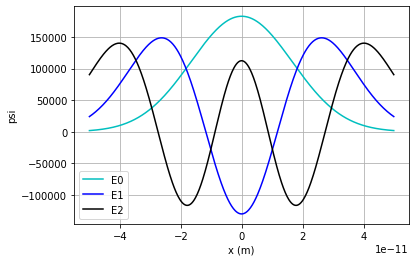

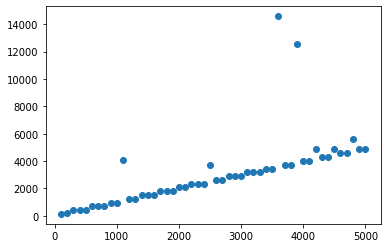

In [5]:
from scipy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel, grid, legend
from numpy import linspace
from scipy.integrate import odeint

# Constantes
e=1.602*10**-19
V0=50*e  # J
a=10**-11           # Angstrom
xi=-10**-10         #posicion inicial
xf=10**-10          #posicion final
psi_0=0.0
hbar=1.05457*10**-34 # J*s
m=9.10938*10**-31    # masa del electron
N=1000               # numero de pasos
h=(xf - xi) / N
def psi(E):
    def f(r, x):
        Vx=V0*x**2/a** 2
        #Vx=0.0
        #Vx=V0*x**4/a** 4
        #Vx=V0*(x/L)*(x/L-1)
        psi = r[0]
        phi = r[1]
        fphi=(2*m/hbar**2)*(Vx-E)*psi
        return array([phi,fphi], float)
    r = array([0.0, 1.0] ,float)
    x=linspace(xi,xf,N)
    rsol=odeint(f,r,x)
    funON = rsol[:,0]
    return array(funON, float)

#metodo de la secante
def secante_normalizacion(E1, E2):
    errorA = e / 1000 #  eV
    funON = psi(E1)
    psi2 = funON[N - 1]
    while abs(E1-E2) > errorA:
        funON=psi(E2)
        psi1,psi2=psi2,funON[N-1]
        E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)

    # normalizacion de la funcion de onda con el metodo de simpson
    mod_squared = funON * funON
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + 4\
                       * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )
    return E2 /e , funON / sqrt(2*integral)

# primeras 3 energias del oscilador armonico cuantico
E0, psi0 = secante_normalizacion(0, 0.5*e)
E1, psi1 = secante_normalizacion(400*e, 600*e)
E2, psi2 = secante_normalizacion(900*e, 1100*e)
print('E0° = ', E0, 'eV')
print('E1° = ', E1, 'eV')
print('E2° = ', E2, 'eV')
xpuntos = arange(xi, xf, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
plot(xpuntos[x_range], psi0[x_range],'c', label="E0")
plot(xpuntos[x_range], psi1[x_range],'b', label="E1")
plot(xpuntos[x_range], psi2[x_range],'k', label="E2")
xlabel('x (m)')
ylabel('psi')
grid("on")
legend()
show()
energias=[]
I=[]
i=0
for i in arange(0,5000,100):
    E0, psi0 = secante_normalizacion(i*e, (i+100)*e)
    i=i+100
    #print(i-100,E0)
    I.append(i)
    energias.append(E0)
plot(I,energias,'o')

NameError: name 'secante_normalizacion' is not defined